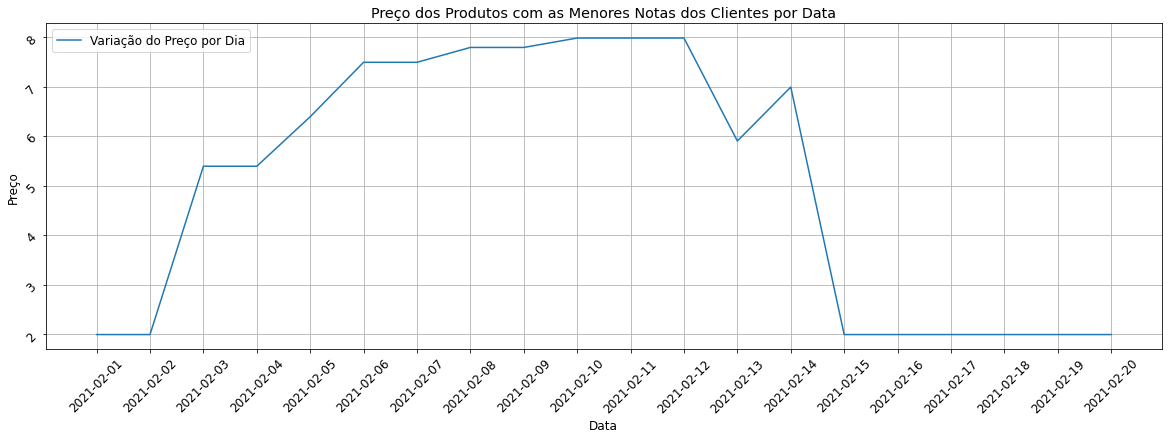

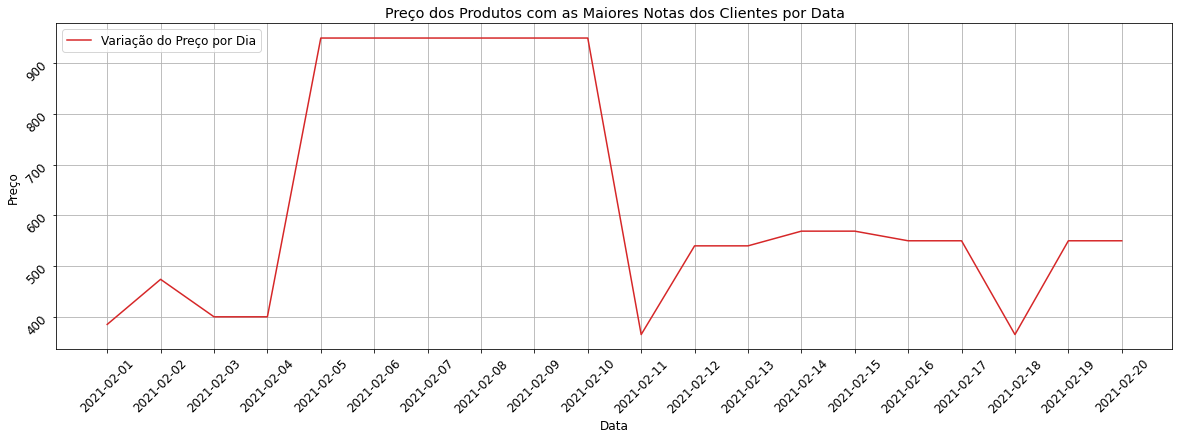

In [51]:
# Biblioteca para manipulação de dados
import pandas as pd
# Biblioteca para criação de graficos 
import matplotlib.pyplot as plt
# Lendo os dados
df = pd.read_csv('C:\\Users\\lucas\\Downloads\\dataset.csv', encoding='utf-8')
# Renomeando as colunas
df.columns = ['data','top_100_mais_vendidos','nome_produto','nota_clientes','numero_comentario_cliente','preco_produto']
# Removendo linhas desnecessárias 
df.drop(df.query('nota_clientes == "Not available"').index, inplace = True)
df.drop(df.query('preco_produto == "Not available"').index, inplace = True)
# Ajuste de dados removendo caracteres desnecessários
df.nota_clientes.replace('Not available','0.0', inplace = True)
df.preco_produto.replace('Not available','0.0', inplace = True)
df.preco_produto.replace('\$', '',regex=True, inplace = True)
df.preco_produto.replace(',', '',regex=True, inplace = True)
# Conversão de tipos 
df.nota_clientes = df.nota_clientes.astype('float64')
df.preco_produto = df.preco_produto.astype('float64')
# Pegando as menores avaliações do clientes para os produtos
menor_nota = df[['data','nota_clientes','preco_produto']]
menor_nota = menor_nota.groupby(['data']).min()
menor_nota = menor_nota.reset_index()
menor_nota = menor_nota.head(20)
# Pegando as maiores avaliações do clientes para os produtos
maior_nota = df[['data','nota_clientes','preco_produto']]
maior_nota = maior_nota.groupby(['data']).max()
maior_nota = maior_nota.reset_index()
maior_nota = maior_nota.head(20)
# Gerando gráfico do Preço dos Produtos com as Menores Notas dos Clientes por Data
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(menor_nota.data, menor_nota.preco_produto, color='tab:blue', label='Variação do Preço por Dia')
ax.set_xlabel('Data')
ax.set_ylabel('Preço')
ax.set_title('Preço dos Produtos com as Menores Notas dos Clientes por Data')
ax.grid(True)
ax.legend(loc='upper left')
ax.tick_params(labelrotation=45)
# Gerando gráfico do Preço dos Produtos com as Maiores Notas dos Clientes por Data
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(maior_nota.data, maior_nota.preco_produto, color='tab:red', label='Variação do Preço por Dia')
ax.set_xlabel('Data')
ax.set_ylabel('Preço')
ax.set_title('Preço dos Produtos com as Maiores Notas dos Clientes por Data')
ax.grid(True)
ax.legend(loc='upper left')
ax.tick_params(labelrotation=45)